Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt, exp
from numpy.random import randn
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

Importing the boston dataset (It doesn't work via sklearn so we need to use URL to fetch it)

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

Shuffling the arrays in Unison

In [3]:
X, Y = shuffle(X, Y, random_state = 371)
scaler = StandardScaler()
X = scaler.fit_transform(X)

Function implementations for Neural Network from Scratch

In [4]:
def He_WeightInit(prevNodes,curNodes):
    std = sqrt(2.0/prevNodes)
    W = []
    for i in range(0,curNodes):
        wi = randn(prevNodes)
        wi = wi * std
        W.append(wi)
    W = np.array(W)
    return W

def LeakyReLU(x):
    return max(x,0.01*x);

def LeakyReLUderiv(x):
    if(x >= 0):
        return 1
    return 0.01

def Identity(x):
    return x

def IdentityDeriv(x):
    return 1

def Init_Bias(n):
    b = [0.01 for i in range(0,n)]
    b = np.array(b)
    return b.reshape(-1,1)

Neural Network

In [5]:
def BuildNeuralNetwork(X, Y, HiddenLayers, OutputLayer, Iterations, LearningRate):
    InitialDim = len(X[0])
    W = []
    W.append([])
    B = []
    B.append([])
    for i in range(0, len(HiddenLayers)):
        if (i == 0):
            W.append(He_WeightInit(InitialDim, HiddenLayers[i]))
        else:
            W.append(He_WeightInit(HiddenLayers[i-1], HiddenLayers[i]))
        B.append(Init_Bias(HiddenLayers[i]))
    W.append(He_WeightInit(HiddenLayers[len(HiddenLayers)-1], OutputLayer))
    B.append(Init_Bias(OutputLayer))
    lReLU = np.vectorize(LeakyReLU)
    lReLUderiv = np.vectorize(LeakyReLUderiv)
    Idt = np.vectorize(Identity)
    idtderiv = np.vectorize(IdentityDeriv)
    scores = []
    iteration = []
    for iter in range(1, Iterations+1):
        ypredict = []
        dW = [np.zeros_like(w) for w in W]
        dB = [np.zeros_like(b) for b in B]
        for dataidx in range(0, len(X)):
            # Forward Propagation
            x = X[dataidx].reshape(-1, 1)
            Z = []
            A = []
            Z.append(x)
            A.append(x)
            for layer in range(1, len(W)):
                Wi = W[layer]
                Zi = np.add(np.dot(Wi, x), B[layer])
                Z.append(Zi)
                if layer == (len(W) - 1):
                    Ai = Idt(Zi)
                else:
                    Ai = lReLU(Zi)
                A.append(Ai)
                x = Ai
            ypredict.append(x[0])

            # Back Propagation
            dZ = np.subtract(x, Y[dataidx])
            for layer in range(len(W) - 1, 0, -1):
                dW[layer] += np.dot(dZ, A[layer - 1].T)
                dB[layer] += dZ
                if layer > 1:
                    dZ = np.dot(W[layer].T, dZ) * lReLUderiv(Z[layer - 1])

        # Weight & Bias Adjustment
        for layer in range(1, len(W)):
            W[layer] -= LearningRate * (dW[layer] / len(X))
            B[layer] -= LearningRate * (dB[layer] / len(X))

        # Calculating Metrics
        ypredict = np.array(ypredict)
        scores.append(r2_score(Y, ypredict))
        iteration.append(iter)
        if (iter % 10) == 0:
            print("Iteration (" + str(iter) + "): Accuracy = " + str(scores[len(scores)-1]) + ", Loss = " + str(mean_squared_error(Y, ypredict)))
    plt.plot(iteration, scores, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=2)
    plt.xlabel('Iteration')
    plt.ylabel('Score')
    return W, B


Building the Artificial Neural Network

Iteration (10): Accuracy = 0.29288184716344823, Loss = 59.69460061242933
Iteration (20): Accuracy = 0.4626824510593909, Loss = 45.360108996484975
Iteration (30): Accuracy = 0.573393268589157, Loss = 36.01395091893589
Iteration (40): Accuracy = 0.6471693444547759, Loss = 29.78580733941675
Iteration (50): Accuracy = 0.7005706846826598, Loss = 25.277689899234392
Iteration (60): Accuracy = 0.7310296873013056, Loss = 22.706354417208836
Iteration (70): Accuracy = 0.7540596556385027, Loss = 20.76217471189211
Iteration (80): Accuracy = 0.7657318680153693, Loss = 19.776811723676534
Iteration (90): Accuracy = 0.7774668444090129, Loss = 18.78615022502206
Iteration (100): Accuracy = 0.7918787719517371, Loss = 17.56950169851046
Iteration (110): Accuracy = 0.8025946300667463, Loss = 16.664873712608948
Iteration (120): Accuracy = 0.8126707635944244, Loss = 15.814250992432102
Iteration (130): Accuracy = 0.8220231182652584, Loss = 15.024729362105246
Iteration (140): Accuracy = 0.8295366867972447, Loss 

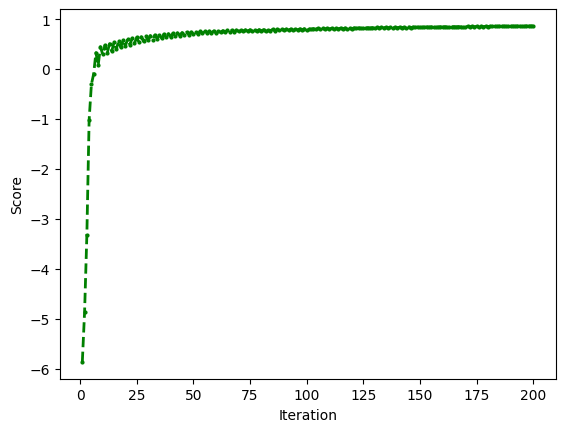

In [6]:
W, B = BuildNeuralNetwork(X,Y,[9,9],1,200,0.01)

Printing the Weight and Bias parameters for the network

In [7]:
for layer in range(1,len(W)):
    print("Weight Matrix from Layer" + str(layer) + " to " + str(layer + 1))
    print(W[layer])
    print("Bias Matrix from Layer" + str(layer) + " to " + str(layer + 1))
    print(B[layer])

Weight Matrix from Layer1 to 2
[[-0.40572403  0.29107582 -0.51032961 -0.72050197  0.66286717  0.38085139
   0.049178   -0.90231726 -0.05707315 -0.19402248  0.01213305  0.14634097
  -0.51678175]
 [ 0.03640964  0.39042442 -0.57471507  0.23898498  0.28560869  0.24562241
   0.51020645 -0.23087265 -0.38746958 -0.35158882  0.05823056 -0.29632452
  -0.68606505]
 [-0.71654258 -0.17346749 -0.66622696 -0.60136049  0.35010242 -0.9290112
   0.08281708  0.05258277 -0.26080264  0.08438396  0.1545858  -0.05136584
   0.6379824 ]
 [ 0.41961558 -0.11767573  0.53500589 -0.34398314 -0.28067837  0.47941931
  -0.69215035  0.08227407 -0.06540495  0.02564195 -0.17602779 -0.51714089
   0.1967323 ]
 [-0.24259372 -0.11357381  0.65787088  0.10220029 -0.24817662 -0.25630464
   0.69639272 -0.43723138  1.04121967  0.31339891 -0.33249505 -0.02620747
  -1.45308786]
 [-0.18723604  0.49387246  0.71280858 -0.08452717 -0.56976824  0.6193757
   0.1371768   0.17830774  0.72615947 -0.12768967  0.26557017  0.2200591
  -0.5193

Neural Network for same dataset using Tensorflow

In [8]:
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)
def BuildTFNN(X, Y, HiddenLayers, OutputLayer, Iterations, LearningRate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X.shape[1],)))
    for units in HiddenLayers:
        model.add(tf.keras.layers.Dense(units, activation=leaky_relu))
    model.add(tf.keras.layers.Dense(OutputLayer, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=LearningRate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X, Y, epochs=Iterations, batch_size=506, verbose=1)

    y_predict = model.predict(X)
    scores = r2_score(Y, y_predict)
    loss = mean_squared_error(Y, y_predict)
    print("Accuracy = {:.4f}, Loss = {:.4f}".format(scores, loss))

    return model

Builing Tensorflow Model

In [9]:
NNmodel = BuildTFNN(X,Y,[9,9],1,200,0.01)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 577.6169
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 568.4734
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 558.6993
Epoch 4/200
1/1 [==============================] - 0s 23ms/step - loss: 548.4751
Epoch 5/200
1/1 [==============================] - 0s 24ms/step - loss: 537.8061
Epoch 6/200
1/1 [==============================] - 0s 29ms/step - loss: 526.7178
Epoch 7/200
1/1 [==============================] - 0s 31ms/step - loss: 515.3412
Epoch 8/200
1/1 [==============================] - 0s 25ms/step - loss: 503.7208
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 491.7970
Epoch 10/200
1/1 [==============================] - 0s 24ms/step - loss: 479.5712
Epoch 11/200
1/1 [==============================] - 0s 16ms/step - loss: 467.0066
Epoch 12/200
1/1 [==============================] - 0s 15ms/step - loss: 454.0568
Epoch 13/200
1/1 [=========

## Performance Comparison

* Both the neural networks achieved similar performance metrics.
The neural network built from scratch using NumPy and mathematical libraries achieved an accuracy of 0.8615 and a loss of 11.69.
* The neural network built using TensorFlow achieved an accuracy of 0.8614 and a loss of 11.75.
* This demonstrates that the custom implementation matches the performance of the TensorFlow-based implementation.

## Gradient Descent Techniques:

* Both neural networks learned using gradient descent techniques with learning rate of 0.01 and batch size of 506.
* This indicates that the optimization algorithms used in both implementations were effective in minimizing the loss function.

## Architecture Details:

* The architecture of both neural networks included an input layer with 13 nodes, followed by 2 hidden layers.
* Leaky ReLU activation function was used in the hidden layers.
* Each hidden layer consisted of 9 nodes.
* The output layer utilized the Identity activation function.
* The use of He Weight Initializer suggests that the weights were initialized appropriately for effective learning for the scratch implementation.

## Conclusion:

* The successful performance of the custom-built neural network demonstrates an understanding of fundamental concepts in neural network implementation.
* Both implementations achieved comparable results, indicating proficiency in both custom implementation and using high-level frameworks like TensorFlow.